# برنامه شبیه سازی صف بیمارستان
توی این برنامه سعی می کنیم حالت های مختلف صف در مسیر آی سی یو، اتاق عمل و بخش عمومی رو بررسی کنیم. ممکنه من مساله رو اشتباه فهمیده باشم ولی خیلی هم مهم نیست.

از نظر من مساله اینه: یک اتاق آی سی یو داریم با تعدادی تخت و یک بخش عمومی با تعدادی تخت. مسیر اینطوریه که اول بیمار با مشکل حاد به آی سی یو می رسه، بعد در صورتی که در بخش عمومی اتاق خالی داشته باشیم، عمل می شه و به بخش عمومی می ره و بعد از مدتی مرخص می شه.
    
شرایط اینهاست:
    
    - همیشه بیمار منتظر برای بستری شدن در آی سی یو هست
    - اگر در بخش تخت خالی نباشه نمی تونیم کسی رو عمل کنیم در نتیجه از آی سی یو کسی کم نمی شه
    - در ابتدای ورود به بخش یا آی سی یو، مشخص می شه که بیمار حداقل چند روز باید اینجا بمونه. تابع get_random_days اینکار رو انجام می ده و بر اساس یک تابع نرمال
    
کلیت سیستم بر اساس دو دیکشنری کار می کنه:
ward & icu
مثلا 
icu = {0: 3, 1:2, 3:0}
می گه که در آی سی یو سه تخت داریم که در اولی بیماری هست که باید ۳ روز دیگه در آی سی یو بمونه، در دومی بیماری هست که باید ۲ روز در آی سی یو بمونه و در سومی بیماری نیست.

نکته: من فکر می کردم بعد از جراحی هم می رن تو آی سی یو ولی شاید این مساله در تعداد روزهای نیازمند بستری دیده شده و شاید هم نمی رن. به هرحال این یه تمپلیت است و بیمارستان می تونه بنا به نیاز خودش تغییرش بده و تنظیمش کنه

ویدئوی آموزشی این نوت بوک رو از اینجا ببینین: 
[https://www.youtube.com/watch?v=jRASorLrZH4](https://www.youtube.com/watch?v=jRASorLrZH4)

***
## توضیحات مربوط به این ویرایش
این فایل، در واقع ویرایش شده فایل نوت بوک اصلی نوشته شده توسط جادی است که می توانید آن را در دایرکتوری مشابه همین فایل مشاهده کنید. 
علت آنکه خود فایل اصلی ویرایش نشده آن است که در صورت مِرج شدن ریپوزیتوری ها، فایل اصلی به هم نریزد و برای استفاده های بعدی در دسترس باشد. 

### چه چیزی ویرایش شده؟
1. اصلاحاتی در کلمات انگلیسی یا متن توضیحات مورد اشاره در کدها ایجاد شده تا کد نهایی برای یک انگلیسی زبان قابل فهم تر شود 
2. تغییری در ترتیب فرآیندهای یکی از لوپ های اصلی داده شده تا به شرایط متداول و بهینه تر گردش بیماران در بیمارستان ها شبیه تر شود (توضیح دقیق تر به صورت کامنت نوشته شده است). 
3. کدها به صورت یک کلاس تعریف شدند تا بتوان در ادامه با فراخوانی object-oriented شبیه سازی های متنوع و همزمانی را به صورت مقایسه ای انجام داد
4. فانکشن شبیه ساز به گونه ای طراحی شده که بر حسب آرگیومنت مشخص شده برای آن، قادر است گزارش شبیه سازی را به ۴ شیوه مختلف (۲ شیوه نوشتاری و ۲ شیوه گرافیکی) ارائه کند
5. در انتها با طراحی یک دیتافریم بزرگ متشکل از تمامی جفت اعداد قابل تصور برای تخت های بخش و آی سی یو و شبیه سازی گردش یک ساله بیمار در هر کدام از آن ها ، گزارشی کامل تهیه و به صورت یک نمودار کامل رسم می کنیم. به نحوی که با دیدن همان یک نمودار بتوان فهمید که چه ترکیبی از تعداد تخت های بخش و آی سی یو از نظر تعداد جراحی و روزهای هدر رفته بهینه ترین است.   
***

In [46]:
import numpy as np
import matplotlib.pyplot as plt

مشخص کردن تعداد روزهایی که باید شبیه سازی بشن و تعداد اتاق های مختلفی که می خوایم بررسی کنیم. 

In [47]:
TOTAL_DAYS = 365

BEDS = [(7, 10), (10, 10), (12, 10), (7, 12)] # Four pairs of (WARD, ICU) beds

In [48]:
def empty_bed(room): #is there an empty bed in this room?
    for bed in room:
        if room[bed] == 0:
            return True
    return False

def get_random_days(room): # returns random days for ward or icu. changes the formulas as required
    if room == 'ward':
        days = np.round((np.random.normal(3)+1))
    elif room == 'icu':
        days = np.round((np.random.normal(3)+1))
    else:
        days = np.round((np.random.normal(3)+1))
    if days < 1:
        days = 1
    return days

def add_to_ward(): # add one patient to the ward room. we are sure that there is an empty room there
    for i in range(len(ward)):
        if ward[i] == 0:
            ward[i] = get_random_days('ward')
            return


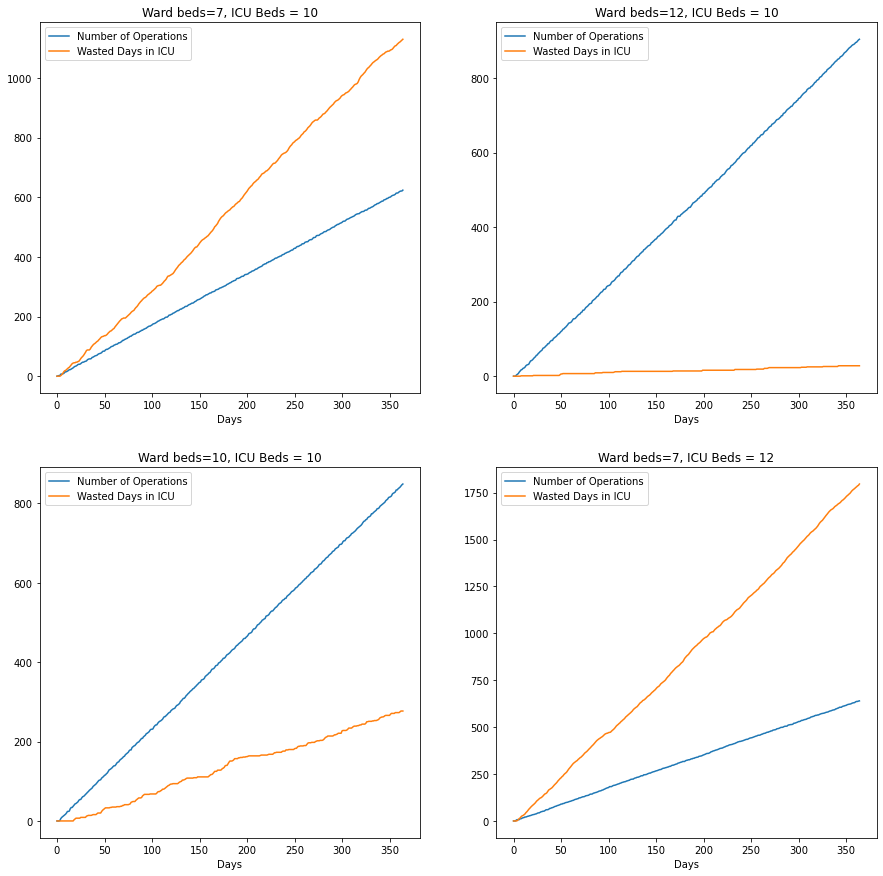

In [49]:
chart_counter = 0

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))


for beds in BEDS: # simulate for each WARD, ICU beds pair
    WARD_BEDS, ICU_BEDS = beds
    
    icu = { key: 0 for key in range(ICU_BEDS)} # empty the ICU
    ward = { key: 0 for key in range(WARD_BEDS)} # empty the Ward
    wasted = np.zeros(TOTAL_DAYS) # number of patients waiting in ICU because there is no bed in WARD
    surgery = np.zeros(TOTAL_DAYS) # number of patients went under surgery and moved from ICU to WARD
    
    for day in range(TOTAL_DAYS): # each iteration is simulating one day in the hospital
#         for i in range(len(icu)): # if we have an empty bed in ICU, add a patient there.
#             if icu[i] == 0:
#                 icu[i] = get_random_days('icu')
                
#         for i in range(len(icu)): # then we check the ICU patients and process them.
#             if icu[i] > 1: # if needs to stay more, just deduct one day
#                 icu[i] -= 1
#             else:  # other wise, if there is an empty bed in ward, do the surgery and move the patient to ward
#                 if empty_bed(ward):
#                     surgery[day] += 1
#                     icu[i] = 0
#                     add_to_ward()
#                 else:
#                     wasted[day] += 1

#         for i in range(len(ward)): # process the ward: reduce one day from stay time.
#             if ward[i] >= 1:
#                 ward[i] -= 1


#         the original for loop is as above (commented); However, I think it is more realistic and efficinet
#         to change the order of these operations.
#         I think we should process the WARD, at first. because it may result in a discharged bed (0)
#         This empty bed should be used as a sign for a new surgery "in the same day"
#         Also, checking for empty ICU beds should be processed at the end,
#         because some beds in ICU might have become free in the same day (as a new surgery takes place)
#         and this free icu bed should be filled in the same day - rather than the day after.

        for i in range(len(ward)): # process the ward: deduct one day from stay time.
            if ward[i] >= 1:
                ward[i] -= 1

        for i in range(len(icu)): # then we check the ICU patients and process them.
            if icu[i] > 1: # if needs to stay more, just deduct one day
                icu[i] -= 1
            elif icu[i] ==1:  # other wise, if there is an empty bed in ward, do the surgery and move the patient to ward
            # There are 2 reasons for changing the original "else" to "elif icu[i] ==1":
            # 1- The order of operations in the main for loop is revised, therfore icu beds with "0" value are not excluded prior to this part.
            # 2- If someday, we want to simulate a situation in which there is no patient in the ICU waiting-list,
            # we might want to let the beds to stay free, and excluded from being processed at this part.
                if empty_bed(ward):
                    surgery[day] += 1
                    icu[i] = 0
                    add_to_ward()
                else:
                    wasted[day] += 1
                    
        for i in range(len(icu)): # if we have an empty bed in ICU, add a patient there.
            if icu[i] == 0:
                icu[i] = get_random_days('icu')

                
    # draw chart for this ICU & Ward bed count pair
    chart_x = chart_counter % 2
    chart_y = int(chart_counter / 2)
    chart_counter += 1
                
    ax[chart_x][chart_y].plot(np.cumsum(surgery)) # draw comulative sums
    ax[chart_x][chart_y].plot(np.cumsum(wasted))  # draw comulative sums
    ax[chart_x][chart_y].set_xlabel("Days")
    ax[chart_x][chart_y].set_title(f"Ward beds={WARD_BEDS}, ICU Beds = {ICU_BEDS}")
    ax[chart_x][chart_y].legend(('Number of Operations', 'Wasted Days in ICU'))
    
plt.show()            

# New codes:

In [50]:
from mpl_toolkits import mplot3d #for making 3D plots
import pandas as pd
import seaborn as sns #for making hue-size based scatter plot
%matplotlib inline
#%matplotlib qt 
#use "%matplotlib qt" (instead of %matplotlib inline), if you want to see the interactive 3D plots pop-ups.

In [51]:
class simulation: # Defining a "class" for the simulation process, in order to use the benefits of OOP.
    def __init__(self, days, beds): # each "simulation" can be created using 2 arguments: "days" & "beds".                       
        self.days = days
        self.beds = beds
    
    def simulate(self, resType): # resType should be 0 : if you don't need the results to be printed.
                                                # or 1 : if you want icu,ward,wasted,surgery to be printed for every day
                                                # or 2 : if you want to print cummulative sum of "Wasted" & "Surgery" for each ward-icu pair.
                                                # or 3 : if you want a 3D plot for cummulative sum of "Wasted" & "Surgery".
                                                # or 4 : if you want a 2D scatter plot showing "total Surgery" and "total wasted days" with "size" and "color gradient" of the dots.
        
        # bellow are the inner functions.
        def empty_bed(room): #is there an empty bed in this room?
            for bed in room:
                if room[bed] == 0:
                    return True
            return False

        def get_random_days(room): # returns random days for ward or icu. changes the formulas as required
            if room == 'ward':
                days = np.round((np.random.normal(3)+1))
            elif room == 'icu':
                days = np.round((np.random.normal(3)+1))
            else:
                days = np.round((np.random.normal(3)+1))
            if days < 1:
                days = 1
            return days

        def add_to_ward(): # add one patient to the ward room. we are sure that there is an empty room there
            for i in range(len(ward)):
                if ward[i] == 0:
                    ward[i] = get_random_days('ward')
                    return
        
        # Bellow, is the same for-loop as previous.
        BEDS= self.beds
        TOTAL_DAYS= self.days
        
        # initializing lists for final Per-simulation report of wasted , surgery, ward, icu
        WASTED_LIST= []
        SURGERY_LIST= []
        WARD_LIST=[]
        ICU_LIST=[]
        
        for beds in BEDS: # simulate for each WARD, ICU beds pair
            WARD_BEDS, ICU_BEDS = beds

            icu = { key: 0 for key in range(ICU_BEDS)} # empty the ICU
            ward = { key: 0 for key in range(WARD_BEDS)} # empty the Ward
            wasted = np.zeros(TOTAL_DAYS) # number of patients waiting in ICU because there is no bed in WARD
            surgery = np.zeros(TOTAL_DAYS) # number of patients went under surgery and moved from ICU to WARD

            for day in range(TOTAL_DAYS): # each iteration is simulating one day in the hospital
                
                for i in range(len(ward)): # process the ward: deduct one day from stay time.
                    if ward[i] >= 1:
                        ward[i] -= 1

                for i in range(len(icu)): # then we check the ICU patients and process them.
                    if icu[i] > 1: # if needs to stay more, just deduct one day
                        icu[i] -= 1
                    elif icu[i] == 1:# other wise, if there is an empty bed in ward, do the surgery and move the patient to ward
                        if empty_bed(ward):
                            surgery[day] += 1
                            icu[i] = 0
                            add_to_ward()
                        else:
                            wasted[day] += 1
                            

                for i in range(len(icu)): # if we have an empty bed in ICU, add a patient there.
                    if icu[i] == 0:
                        icu[i] = get_random_days('icu')
                
                # Daily messages or reports.
                if resType == 1:
                    print(f">>> DAY {day+1} ****** {WARD_BEDS} Ward-beds & {ICU_BEDS} ICU-beds ******")
                    print("* ICU=  ", np.fromiter(icu.values(), dtype=int))
                    print("* WARD= ", np.fromiter(ward.values(), dtype=int))
                    print("* wasted=  ", wasted.astype(int))
                    print("* surgery= ", surgery.astype(int))
            
            # Per-simulation calculation fo cummulative sum for wasted and surgery. 
            total_wasted=np.sum(wasted).astype(int)
            total_surgery=np.sum(surgery).astype(int)
            # Per-simulation completion of lists which were initilized before.
            WASTED_LIST.append(total_wasted)
            SURGERY_LIST.append(total_surgery)
            WARD_LIST.append(WARD_BEDS)
            ICU_LIST.append(ICU_BEDS)
            
            # Per-simulation messages or reports.
            if resType == 1:
                print("==================================================")
            elif resType ==2:
                print(f">>> {WARD_BEDS} Ward beds - {ICU_BEDS} ICU beds: {total_wasted} wasted - {total_surgery} surgeries")
        
        # Global reports or messeges.
        message="Choose the result-type by putting a number from 0 to 4 in the parenthesis of 'simulate()'.\n 0 : No results \n 1 : Daily detailed log \n 2 : Cummalative results of each ward-icu pair. \n 3 : Graphical 3D-plot which uses 'z-dimension' and 'dot-size' to represent 'Total surgery' and 'Wasted ICU days'. \n 4 : Flat scattered plot, which uses 'color gradient' and 'dot-size' to show 'Wasted ICU days' and 'Total surgeries'."
        
        if resType == 0:
            print("Simulations are performed successfully. \nHowever, you choosed not to see the results, as you typed 0 in the parenthesis!")
            print(message)
            
        elif resType >= 5:
            print("The requested result-type is not valid.")
            print(message)
            
        elif resType == 3:
            # Creating dataset
            x = WARD_LIST
            y = ICU_LIST
            z = SURGERY_LIST
            s = WASTED_LIST # We want to use it to define the size of dots in the plot

            # Creating figure
            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111, projection = '3d')
            # Setting labels
            ax.set_xlabel("Ward beds")
            ax.set_ylabel("ICU beds")
            ax.set_zlabel("Total Surgeries")
            # Creating 3D plot by matplotlib
            ax.scatter3D(x, y, z, color = "red", s=s)
            plt.title("Simulation Results")
            # show plot and the guide message
            print("Each dot in the plot stands for each ward-icu pair simulation. \n"
                  "'Size' of the dots represent 'Wasted ICU days' in each simulation. \n"
                  "Bigger dots= more Wasted ICU days.")
            plt.show()
            # Print the Data-frame head
            rep_df= pd.DataFrame({
                'Ward' : x,
                'ICU' : y,
                'Toral surgeries' : z,
                'Wasted ICU days' : s
            })
            print(rep_df.head())
      
        elif resType == 4:
            # create the DataFrame
            sim_df= pd.DataFrame({
                'Ward' : WARD_LIST,
                'ICU' : ICU_LIST,
                'Surgeries' : SURGERY_LIST,
                'Wasted': WASTED_LIST   
            })
            # printing the message & plotting the scatter plot by seaborn
            print("Each dot in the plot stands for one ward-icu pair simulation. \n"
                  "'Size' and 'color-gradient' of the dots represent 'Total operated surgeries' and 'Wasted ICU days' in each simulation. \n"
                  "Bigger dots = more Surgeries , Warmer dots= more Wasted icu days.")
            sns.relplot(
                data=sim_df,
                x="Ward", y="ICU", size="Surgeries", hue="Wasted", height = 6, sizes=(20, 200),
                palette=plt.get_cmap('coolwarm',10)
            )
            # Printing Data-frame head
            print("************ Dataframe Overview ************")
            print(sim_df)

# simulation demo (resType 0 , 1 , 2 , 3 , 4 )

* Initiate the simulation with: **simulation(days, beds)**
* Then perform the simulation with **simulate(resType)**
* **resType** is a single integer **from 0 to 4** which determines the way you want the results of the simulation to be shown.

In [52]:
# Creating a simple dataset for simmulation demos
bed_extend = []
for i in range(4):
    bed_extend.append((5+i,25-i))

In [53]:
sim0 = simulation(3, bed_extend)
sim0.simulate(0)

Simulations are performed successfully. 
However, you choosed not to see the results, as you typed 0 in the parenthesis!
Choose the result-type by putting a number from 0 to 4 in the parenthesis of 'simulate()'.
 0 : No results 
 1 : Daily detailed log 
 2 : Cummalative results of each ward-icu pair. 
 3 : Graphical 3D-plot which uses 'z-dimension' and 'dot-size' to represent 'Total surgery' and 'Wasted ICU days'. 
 4 : Flat scattered plot, which uses 'color gradient' and 'dot-size' to show 'Wasted ICU days' and 'Total surgeries'.


In [54]:
sim1 = simulation(3, bed_extend)
sim1.simulate(1)

>>> DAY 1 ****** 5 Ward-beds & 25 ICU-beds ******
* ICU=   [3 4 1 3 4 5 5 4 4 3 5 3 4 4 4 5 4 4 5 5 4 5 4 4 4]
* WARD=  [0 0 0 0 0]
* wasted=   [0 0 0]
* surgery=  [0 0 0]
>>> DAY 2 ****** 5 Ward-beds & 25 ICU-beds ******
* ICU=   [2 3 2 2 3 4 4 3 3 2 4 2 3 3 3 4 3 3 4 4 3 4 3 3 3]
* WARD=  [3 0 0 0 0]
* wasted=   [0 0 0]
* surgery=  [0 1 0]
>>> DAY 3 ****** 5 Ward-beds & 25 ICU-beds ******
* ICU=   [1 2 1 1 2 3 3 2 2 1 3 1 2 2 2 3 2 2 3 3 2 3 2 2 2]
* WARD=  [2 0 0 0 0]
* wasted=   [0 0 0]
* surgery=  [0 1 0]
>>> DAY 1 ****** 6 Ward-beds & 24 ICU-beds ******
* ICU=   [5 2 4 2 2 3 4 4 6 5 3 4 3 5 5 6 4 4 4 5 5 6 4 2]
* WARD=  [0 0 0 0 0 0]
* wasted=   [0 0 0]
* surgery=  [0 0 0]
>>> DAY 2 ****** 6 Ward-beds & 24 ICU-beds ******
* ICU=   [4 1 3 1 1 2 3 3 5 4 2 3 2 4 4 5 3 3 3 4 4 5 3 1]
* WARD=  [0 0 0 0 0 0]
* wasted=   [0 0 0]
* surgery=  [0 0 0]
>>> DAY 3 ****** 6 Ward-beds & 24 ICU-beds ******
* ICU=   [3 5 2 4 5 1 2 2 4 3 1 2 1 3 3 4 2 2 2 3 3 4 2 5]
* WARD=  [5 4 2 4 0 0]
* wasted

In [55]:
sim2 = simulation(20, bed_extend)
sim2.simulate(2)

>>> 5 Ward beds - 25 ICU beds: 313 wasted - 24 surgeries
>>> 6 Ward beds - 24 ICU beds: 270 wasted - 27 surgeries
>>> 7 Ward beds - 23 ICU beds: 241 wasted - 36 surgeries
>>> 8 Ward beds - 22 ICU beds: 218 wasted - 36 surgeries


In [56]:
# Creating a bigger dataset for simmulation demos
bed_large = []
for i in range(20):
    bed_large.append((5+i,25-i))

In [57]:
#shows interactive pop-up plot
%matplotlib qt 
sim3 = simulation(30, bed_large)
sim3.simulate(3)

Each dot in the plot stands for each ward-icu pair simulation. 
'Size' of the dots represent 'Wasted ICU days' in each simulation. 
Bigger dots= more Wasted ICU days.
   Ward  ICU  Toral surgeries  Wasted ICU days
0     5   25               35              520
1     6   24               42              463
2     7   23               51              405
3     8   22               58              357
4     9   21               64              299


Each dot in the plot stands for each ward-icu pair simulation. 
'Size' of the dots represent 'Wasted ICU days' in each simulation. 
Bigger dots= more Wasted ICU days.


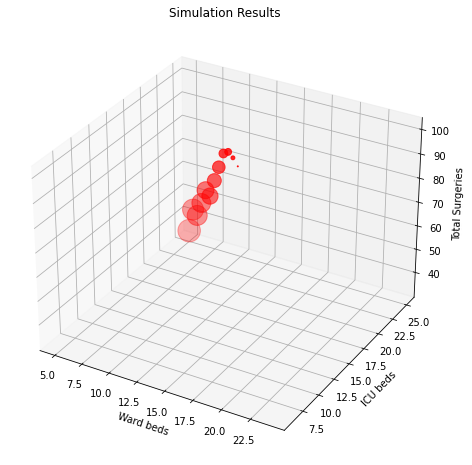

   Ward  ICU  Toral surgeries  Wasted ICU days
0     5   25               34              509
1     6   24               47              439
2     7   23               48              400
3     8   22               57              358
4     9   21               66              289


In [58]:
#shows inline fixed plot
%matplotlib inline 
sim3 = simulation(30, bed_large)
sim3.simulate(3)

Each dot in the plot stands for one ward-icu pair simulation. 
'Size' and 'color-gradient' of the dots represent 'Total operated surgeries' and 'Wasted ICU days' in each simulation. 
Bigger dots = more Surgeries , Warmer dots= more Wasted icu days.
************ Dataframe Overview ************
    Ward  ICU  Surgeries  Wasted
0      5   25        459    7197
1      6   24        555    6491
2      7   23        629    5754
3      8   22        732    5065
4      9   21        819    4317
5     10   20        911    3627
6     11   19        994    2910
7     12   18       1080    2262
8     13   17       1168    1508
9     14   16       1255     717
10    15   15       1285     294
11    16   14       1263      64
12    17   13       1184       6
13    18   12       1098       0
14    19   11        985       0
15    20   10        905       0
16    21    9        804       0
17    22    8        727       0
18    23    7        629       0
19    24    6        545       0


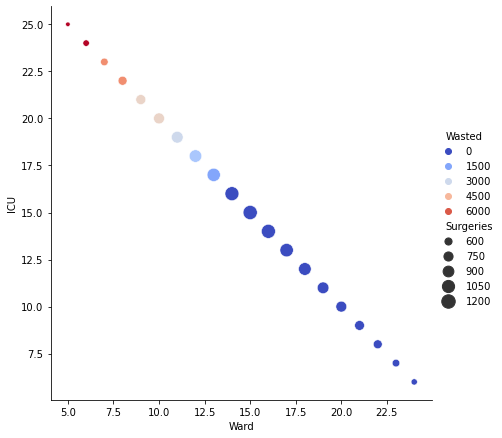

In [59]:
sim4= simulation(365, bed_large)
sim4.simulate(4)

***

# Final Comprehensive Report

### در این قسمت ضمن طراحی یک دیتافریم بزرگ متشکل از تمامی جفت اعداد قابل تصور برای تخت های بخش و آی سی یو و شبیه سازی گردش یک ساله بیمار در هر کدام از آن ها ، گزارشی کامل از آنها تهیه و آن را به صورت یک نمودار نهایی رسم می کنیم. به نحوی که با دیدن همان یک نمودار بتوان فهمید که چه ترکیبی از تعداد تخت های بخش و آی سی یو منتج به بهینه ترین تعداد جراحی و روزهای هدر رفته می شود.   
### هر نقطه در نمودار نتیجه یک شبیه سازی را نشان می دهد. محور عمودی و افقی تعداد تخت های آی سی یو و بخش هستند.  بزرگتر بودن هر نقطه نشان دهنده جراحی های بیشتر و گرم تر (قرمز تر) بودن رنگ نقاط ، تخت های هدر رفته بیشتر در هر شبیه سازی را نشان می دهد. 

Each dot in the plot stands for one ward-icu pair simulation. 
'Size' and 'color-gradient' of the dots represent 'Total operated surgeries' and 'Wasted ICU days' in each simulation. 
Bigger dots = more Surgeries , Warmer dots= more Wasted icu days.
************ Dataframe Overview ************
     Ward  ICU  Surgeries  Wasted
0       5    5        413     147
1       5    6        444     428
2       5    7        451     695
3       5    8        450    1092
4       5    9        451    1452
..    ...  ...        ...     ...
436    25   21       1894      21
437    25   22       1987      51
438    25   23       2048     115
439    25   24       2114     206
440    25   25       2168     373

[441 rows x 4 columns]


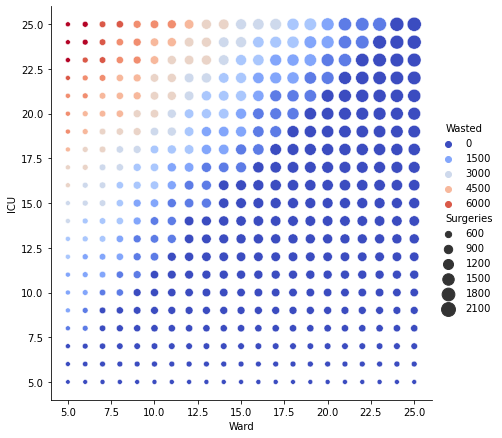

In [60]:
# In this part, We want to simulate all possible ward-icu pairs with minimum & maximum of 5 & 25 beds each
# We will draw a plot which presents results for all possible simulations at once.
# "Bigger dots" = "More operated surgeries"  and  "Warmer dots" = "More wasted ICU beds"
FinalBeds = []
for i in range(21):
    for j in range(21):
        FinalBeds.append((5+i,5+j))

simFinal= simulation(365, FinalBeds)
simFinal.simulate(4)